In [1]:
from voxel import *

In [2]:
# Calculate coordinates of atoms in rhombus
# a = 1
# alpha = 45 deg = pi/4
f = 2 * np.sin(np.pi/8)
e = np.cos(np.pi/8)
r = f*np.sqrt(4-f**2)/(4+2*f)
print(np.cos(np.pi/8)*(e-r), np.sin(np.pi/8)*(e-r))
print(np.cos(np.pi/8)*(e+r), np.sin(np.pi/8)*(e+r))

0.6173165676349102 0.2557008945919878
1.0897902135516373 0.4514058865945597


In [3]:
# matrix corresponding to unit cell (columns are primitive unit vectors)
A = np.array([
    [1., np.sqrt(0.5)],
    [0., np.sqrt(0.5)]
]) * 3

# atom coordinates
mus = np.array([[0.6173,0.2557], [1.0898, 0.4514]])*3

# standard deviation for the Gaussians
sigma = 0.3

# get the field quantity as function
gauss = get_nD_gaussian(A, mus, sigma, 3)

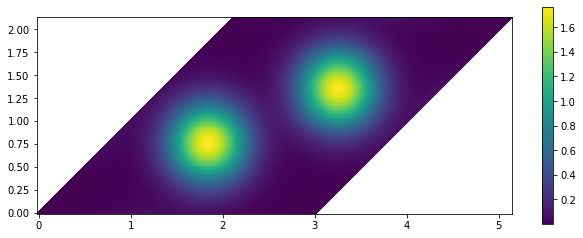

In [4]:
# evaluate the field over the unit cell, n specifies precision
R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)

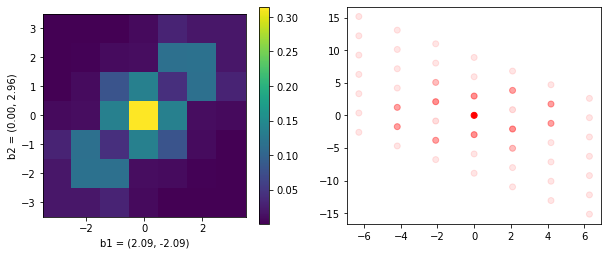

In [5]:
# evaluate field over reciprocal space at integer multiples of the basis vectors of B = 2pi inv(A).T
mx = np.arange(-3,4)
my = np.arange(-3,4)
B, G, SG = reciprocal_lattice(gauss, A, mx, my, n=101) # numerically
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

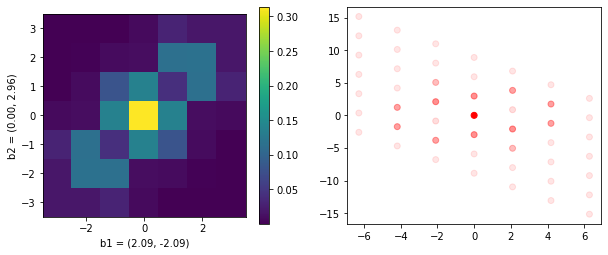

In [6]:
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my) # theoretically
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

## Descriptor

In [7]:
# parameters
L = 12.8
N = 32

In [8]:
width = 2 * np.pi / L * N
width

15.707963267948966

In [9]:
voxel_width = width / N
voxel_width

0.4908738521234052

In [10]:
# get integer ranges such that all points in the desired square
# [-width / 2, width / 2]^d can be computed with reciprocal vectors
# formed with B . (mx x my)
mx, my = get_mesh_coords(A, L, N)

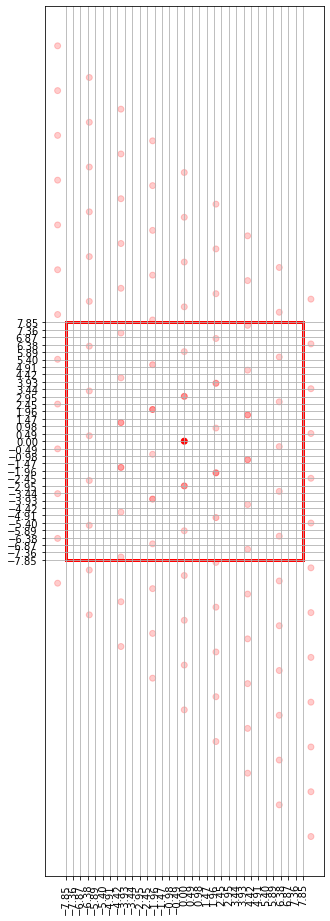

In [11]:
# visualisation of get_mesh_coords
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my)

import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(16,16))
absSG = np.abs(SG)
colors = [(1.,0.,0.,v) for v in  np.maximum(absSG, absSG.max()*0.2) / absSG.max()]
ax.scatter(G[0,:], G[1,:], c=colors)
width = 2*np.pi / L * N
rect = patches.Rectangle((-width/2, -width/2), width, width, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.set_aspect('equal')
plt.xticks(np.linspace(-width/2, width/2, N+1), rotation = 90)
plt.yticks(np.linspace(-width/2, width/2, N+1))
plt.grid(True)
plt.show()

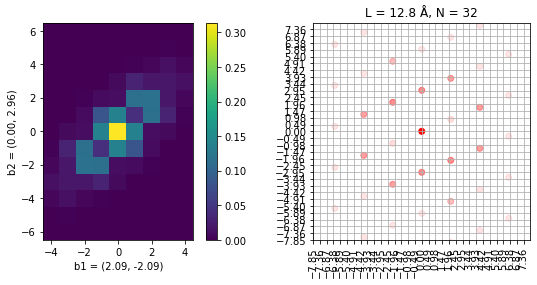

In [12]:
# pass L and N to crop to relevant square 
plot_2D_reciprocal_lattice(B, mx, my, G, SG, L=L, N=N)

In [13]:
# final step:
# place the computed values on a N x N grid
descriptor = adapt_to_voxel_grid(G, SG, L, N)

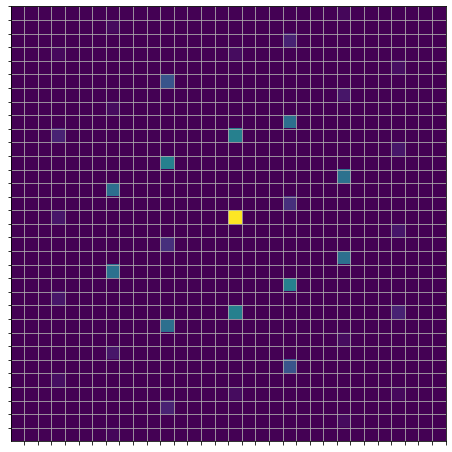

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.imshow(descriptor, origin='lower')
plt.xticks(np.arange(0,N)+0.5)
plt.yticks(np.arange(0,N)+0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.grid(True)

## 3D

In [15]:
A = np.eye(3)
mus =  np.array([[0.,0.,0.]])
sigma = 0.1

mx, my, mz = get_mesh_coords(A, L, N)

In [16]:
%%time
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my, mz)

CPU times: user 1.17 ms, sys: 1.28 ms, total: 2.45 ms
Wall time: 2.54 ms


In [17]:
%%time
gauss = get_nD_gaussian(A, mus, sigma, 3)
B2, G2, SG2 = reciprocal_lattice(gauss, A, mx, my, mz, n=61, verbose=True)

Evaluated field at 226981 points in 6.27 seconds.
Performed Fourier Transform in 1.15 seconds.
CPU times: user 3.85 s, sys: 2.97 s, total: 6.82 s
Wall time: 7.47 s


In [18]:
%%time
gauss = get_nD_gaussian(A, mus, sigma, 3)
B3, G3, SG3 = reciprocal_lattice_fft(gauss, A, mx, my, mz, n=61, verbose=True)

Evaluated field at 226981 points in 3.8343417644500732 seconds.
Performed Fourier Transform in 0.03 seconds.
CPU times: user 2.51 s, sys: 1.38 s, total: 3.89 s
Wall time: 3.87 s


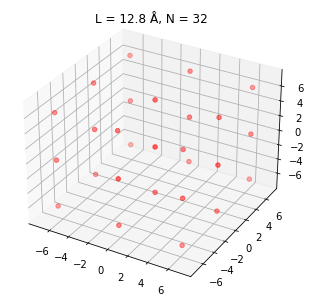

In [19]:
plot_3D_reciprocal_lattice(B, G, SG2, L=L, N=N)

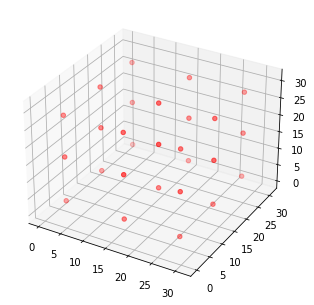

In [20]:
descriptor = adapt_to_voxel_grid(G, SG, L, N)

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)

absSG = descriptor.reshape(-1)
max_sg = absSG.max()
colors = [(1.,0.,0.,v) for v in np.maximum(absSG.reshape(-1) / max_sg, 0.0)]
i = np.arange(0, N)
I = np.meshgrid(i, i, i)
ax.scatter(I[0], I[1], I[2], c=colors)
plt.show()